In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
from statsmodels.compat import lzip
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols


Load the Data

In [115]:
#loading House_Data

df_base = pd.read_csv('kc_house_data.csv')
df_base.reset_index()


,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,10/13/2014,221900.000000,3,1.000000,1180,5650,1.000000,nan,...,7,1180,0.0,1955,0.000000,98178,47.511200,-122.257000,1340,5650
1,1,6414100192,12/9/2014,538000.000000,3,2.250000,2570,7242,2.000000,0.000000,...,7,2170,400.0,1951,1991.000000,98125,47.721000,-122.319000,1690,7639
2,2,5631500400,2/25/2015,180000.000000,2,1.000000,770,10000,1.000000,0.000000,...,6,770,0.0,1933,nan,98028,47.737900,-122.233000,2720,8062
3,3,2487200875,12/9/2014,604000.000000,4,3.000000,1960,5000,1.000000,0.000000,...,7,1050,910.0,1965,0.000000,98136,47.520800,-122.393000,1360,5000
4,4,1954400510,2/18/2015,510000.000000,3,2.000000,1680,8080,1.000000,0.000000,...,8,1680,0.0,1987,0.000000,98074,47.616800,-122.045000,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21592,263000018,5/21/2014,360000.000000,3,2.500000,1530,1131,3.000000,0.000000,...,8,1530,0.0,2009,0.000000,98103,47.699300,-122.346000,1530,1509
21593,21593,6600060120,2/23/2015,400000.000000,4,2.500000,2310,5813,2.000000,0.000000,...,8,2310,0.0,2014,0.000000,98146,47.510700,-122.362000,1830,7200
21594,21594,1523300141,6/23/2014,402101.000000,2,0.750000,1020,1350,2.000000,0.000000,...,7,1020,0.0,2009,0.000000,98144,47.594400,-122.299000,1020,2007
21595,21595,291310100,1/16/2015,400000.000000,3,2.500000,1600,2388,2.000000,nan,...,8,1600,0.0,2004,0.000000,98027,47.534500,-122.069000,1410,1287


Data Clean Step1

In [116]:
#Data Cleaning - Removing 'id' duplicates keeping the most recent selling date
 
df_base = df_base.sort_values('date').drop_duplicates('id', keep='first')
df_base.sort_values('id', ascending = True, inplace = True)
df_base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,4/22/2015,300000.000000,6,3.000000,2400,9373,2.000000,0.000000,0.000000,...,7,2400,0.0,1991,0.000000,98002,47.326200,-122.214000,2060,7316
6729,1200019,5/8/2014,647500.000000,4,1.750000,2060,26036,1.000000,nan,0.000000,...,8,1160,900.0,1947,0.000000,98166,47.444400,-122.351000,2590,21891
8404,1200021,8/11/2014,400000.000000,3,1.000000,1460,43000,1.000000,0.000000,0.000000,...,7,1460,0.0,1952,0.000000,98166,47.443400,-122.347000,2250,20023
8800,2800031,4/1/2015,235000.000000,3,1.000000,1430,7599,1.500000,0.000000,0.000000,...,6,1010,420.0,1930,0.000000,98168,47.478300,-122.265000,1290,10320
3553,3600057,3/19/2015,402500.000000,4,2.000000,1650,3504,1.000000,0.000000,0.000000,...,7,760,890.0,1951,2013.000000,98144,47.580300,-122.294000,1480,3504


In [117]:
#Checking for Nulls in the DataSet

df_base.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2355
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3812
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Data Clean Step 2

In [118]:
#Null approach:

#Waterfront - removing waterfront column as it is uncorrelated to the price variable. 
#Additionally, Seattle is surounded by bodies of water where water views are not a differentiator. 

df_base = df_base.drop(['waterfront'], axis =1)


In [119]:
#View - for the number of viewings we make an assumption that no viewings (0 value) have been made where the value is null.
#The number of nulls in view is unsignificant in the dataset (<1%)

#yr_renovated - we make the assumption here that no renovation has occured for null values in yr_renovated. 

df_base.fillna(method = 'ffill', inplace = True)

df_base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,4/22/2015,300000.000000,6,3.000000,2400,9373,2.000000,0.000000,3,7,2400,0.0,1991,0.000000,98002,47.326200,-122.214000,2060,7316
6729,1200019,5/8/2014,647500.000000,4,1.750000,2060,26036,1.000000,0.000000,4,8,1160,900.0,1947,0.000000,98166,47.444400,-122.351000,2590,21891
8404,1200021,8/11/2014,400000.000000,3,1.000000,1460,43000,1.000000,0.000000,3,7,1460,0.0,1952,0.000000,98166,47.443400,-122.347000,2250,20023
8800,2800031,4/1/2015,235000.000000,3,1.000000,1430,7599,1.500000,0.000000,4,6,1010,420.0,1930,0.000000,98168,47.478300,-122.265000,1290,10320
3553,3600057,3/19/2015,402500.000000,4,2.000000,1650,3504,1.000000,0.000000,3,7,760,890.0,1951,2013.000000,98144,47.580300,-122.294000,1480,3504


In [120]:
#Re-checking for nulls

df_base.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [121]:
######## REVIEW 

df_base ['price_per_sqft_living'] = round(df_base ['price'] / df_base ['sqft_living'])
df_base['renovation'] = np.where(df_base['yr_renovated']>0, 'Yes', 'No')



Data Clean Step 3

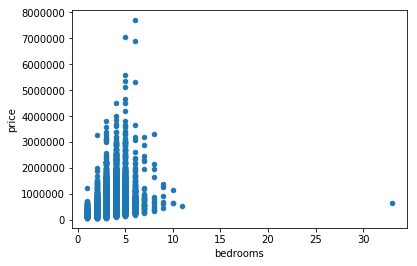

In [122]:
#Sorting by bedroom - identify outlier
df_base = df_base.sort_values('bedrooms', ascending = False)

#plotting bedrooms by Price 
df_base.plot(kind = 'scatter', x ='bedrooms', y = 'price')


In [123]:
#Drop bedroom outlier with 33 rooms 

df_base.drop(df_base.loc[df_base['bedrooms']== 33].index)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,renovation
8748,1773100755,8/21/2014,520000.000000,11,3.000000,3000,4960,2.000000,0.000000,3,...,600.0,1918,1999.000000,98106,47.556000,-122.363000,1420,4960,173.000000,Yes
15147,5566100170,10/29/2014,650000.000000,10,2.000000,3610,11914,2.000000,0.000000,4,...,600.0,1958,0.000000,98006,47.570500,-122.175000,2040,11914,180.000000,No
13301,627300145,8/14/2014,1150000.000000,10,5.250000,4590,10920,1.000000,2.000000,3,...,2090.0,2008,0.000000,98004,47.586100,-122.113000,2730,10400,251.000000,No
19239,8812401450,12/29/2014,660000.000000,10,3.000000,2920,3745,2.000000,0.000000,4,...,1060.0,1913,0.000000,98105,47.663500,-122.320000,1810,3745,226.000000,No
6073,9822700190,8/8/2014,1280000.000000,9,4.500000,3650,5000,2.000000,0.000000,3,...,1120.0,1915,2010.000000,98105,47.660400,-122.289000,2510,5000,351.000000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21310,6003000851,5/22/2014,353000.000000,1,1.000000,550,1279,2.000000,0.000000,3,...,0.0,2008,2014.000000,98122,47.616000,-122.314000,1460,1385,642.000000,Yes
17404,2922703235,11/19/2014,290000.000000,1,1.000000,550,5700,1.000000,0.000000,2,...,0.0,1916,0.000000,98117,47.684600,-122.366000,1100,4560,527.000000,No
17970,3448001975,5/4/2015,351000.000000,1,0.750000,930,6600,1.000000,0.000000,3,...,0.0,1924,0.000000,98125,47.712700,-122.296000,1590,6600,377.000000,No
8438,724069023,4/14/2015,1250000.000000,1,1.250000,1810,5070,1.500000,4.000000,4,...,580.0,1967,0.000000,98075,47.581400,-122.081000,2280,5070,691.000000,No


In [124]:
df_base.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,renovation
5362,6600250050,9/3/2014,518000.000000,4,2.500000,2160,9750,2.000000,0.000000,3,...,0.0,1983,0.000000,98028,47.743800,-122.246000,2840,10535,240.000000,No
17041,5561000920,5/2/2014,630000.000000,4,2.750000,2710,37277,2.000000,0.000000,3,...,0.0,2000,0.000000,98027,47.463400,-121.987000,2390,39299,232.000000,No
19332,3693901720,7/1/2014,535000.000000,4,1.750000,1420,5000,1.500000,0.000000,4,...,0.0,1945,0.000000,98117,47.677100,-122.397000,1490,5000,377.000000,No
17057,2922703260,7/16/2014,469000.000000,3,1.750000,1680,2400,1.500000,0.000000,3,...,510.0,1929,0.000000,98117,47.684900,-122.367000,1080,4560,279.000000,No
353,3363900111,12/3/2014,437500.000000,2,1.000000,990,3120,1.000000,2.000000,5,...,200.0,1907,0.000000,98103,47.680000,-122.353000,1930,3120,442.000000,No
11394,1328320350,12/2/2014,387500.000000,4,2.500000,3190,9856,2.000000,0.000000,3,...,0.0,1979,0.000000,98058,47.444500,-122.126000,2260,7996,121.000000,No
10352,2783100160,5/15/2014,375000.000000,4,1.750000,1890,8000,1.000000,0.000000,4,...,640.0,1960,0.000000,98133,47.757600,-122.333000,1870,8270,198.000000,No
14636,9527000180,7/11/2014,625000.000000,4,3.000000,2530,5625,1.000000,0.000000,3,...,1060.0,1976,0.000000,98034,47.709400,-122.233000,1840,7070,247.000000,No
10157,4141400030,12/1/2014,605000.000000,4,1.750000,2250,10108,1.000000,0.000000,4,...,0.0,1967,0.000000,98008,47.592200,-122.118000,2050,9750,269.000000,No
7921,5029451080,8/21/2014,203000.000000,2,1.000000,1440,6650,1.000000,0.000000,3,...,?,1980,0.000000,98023,47.289600,-122.369000,1600,6847,141.000000,No


In [125]:
df_base.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price_per_sqft_living', 'renovation'],
      dtype='object')

In [132]:
cols = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_living15', 'view', 'condition', 'grade']

In [133]:
type(axes[0][1])

matplotlib.axes._subplots.AxesSubplot

In [134]:
cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_living15',
 'view',
 'condition',
 'grade']

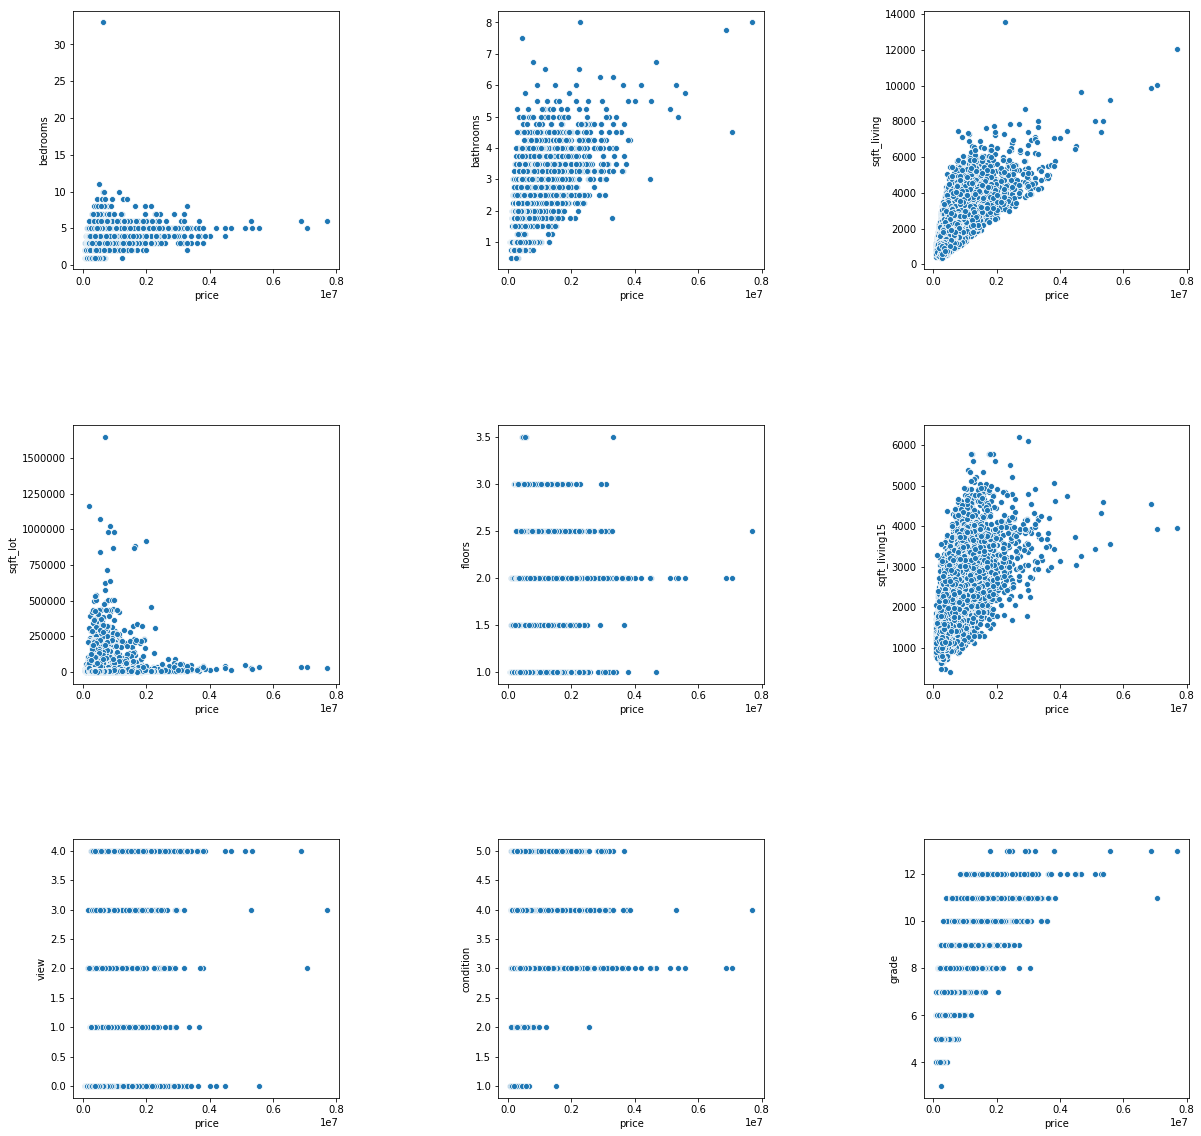

In [135]:
plt.figure(figsize=(20,20))

for i, col in enumerate(cols):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x="price", y=col, data= df_base)
    plt.subplots_adjust(wspace=0.6, hspace=0.6)
    
   


In [ ]:

# for col in cols:
#     plt.figure(figsize=(10, 10))
#     sns.scatterplot(x="price", y=col, data= df_base)


In [ ]:
# f, ax = plt.subplots(figsize=(10, 10))
# ax = sns.scatterplot(x="price", y="bathrooms", data= df_base)


In [ ]:
#remove bathrooms outliers

df_base.sort_values('price', ascending = False, inplace = True)



In [ ]:
#Check renovation impact on Price 

df_base.groupby('renovation')['price'].mean().plot(kind = 'barh', x = 'price', figsize = (7,7))

In [146]:
#Setting up variables for statistical analysis 

X = df_base [['sqft_living', 'grade']]
Y = df_base ['price']


In [147]:
# Setting up the LEARNER
X = sm.add_constant(X)
model_sm = sm.OLS(Y,X)

#Learning
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))

R2 = 0.53
const         -602114.392000
sqft_living       184.271600
grade           99151.419100
dtype: float64


In [148]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                 1.226e+04
Date:                Fri, 17 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:55:01   Log-Likelihood:            -2.9671e+05
No. Observations:               21420   AIC:                         5.934e+05
Df Residuals:                   21417   BIC:                         5.935e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.021e+05   1.34e+04    -44.797      0.000   -6.28e+05   -5.76e+05
sqft_living   184.2716      2.885     63.864      0.000     178.616     189.927
grade        9.915e+04   2262.110     43.831      0.000    9.47e+04    1.04e+05
==============================================================================
Omnibus:                    16826.521   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           997237.116
Skew:                           3.305   Prob(JB):                         0.00
Kurtosis:                      35.767   Cond. No.                     1.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df_base_2 = df_base.drop(['id','yr_built', 'yr_renovated','zipcode', 'lat','long','bathrooms'], axis = 1)
corr1 = df_base_2.corr().round(2)
corr1.sort_values('grade', ascending = False)

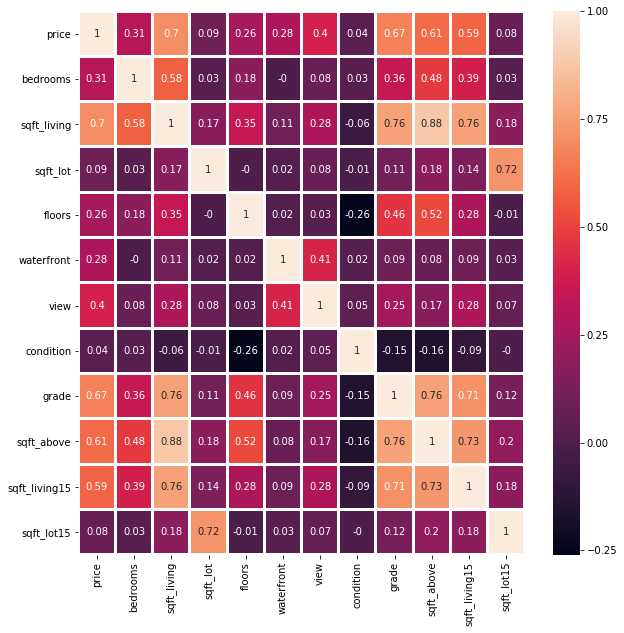

In [131]:
#Updated & Simplified correlation heatmap

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data = corr1, annot = True, annot_kws = {"size": 10}, linewidth = 2)


In [ ]:
pd.set_option('float_format', '{:f}'.format)
df_base_2.describe()

In [ ]:
# from scipy import stats
# df_base_2[(np.abs(stats.zscore(df_base_2)) < 3).all(axis=1)]

In [ ]:
# Questions for Dave:


#How to approach variable selection?
#Can we use standard deviation to exclude outliers where relevant? 
#Or is there a different method we are expected to use?
#Is it ok to keep to two or three variables for the first project?
#Comment on what we've done so far 
